In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_curve, roc_auc_score, confusion_matrix

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

tf.keras.backend.clear_session()

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [69]:
dataset, metadata = tfds.load("tf_flowers", 
                              as_supervised=True, 
                              shuffle_files=False, 
                              with_info=True,
                              split="train")

In [70]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [71]:
class_names = metadata.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [72]:
num_samples = metadata.splits["train"].num_examples
num_samples

3670

In [73]:
for i in dataset.take(10):
    img, lbl = i
    print(img.shape)

(333, 500, 3)
(212, 320, 3)
(240, 320, 3)
(240, 320, 3)
(317, 500, 3)
(212, 320, 3)
(240, 240, 3)
(333, 500, 3)
(240, 320, 3)
(240, 320, 3)


In [74]:
def preprocess_img(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = tf.image.resize(image, size=(224, 224))
    #image = image/255.
    return image, label

In [75]:
split_size = int(0.8 * num_samples)
train_data = dataset.take(split_size)
test_data = dataset.skip(split_size)

In [76]:
len(train_data), len(test_data)

(2936, 734)

In [77]:
train_images = []
train_labels = []
for data in train_data.as_numpy_iterator():
    image, label = data
    train_images.append(image)
    train_labels.append(label)

In [78]:
test_labels = []
for data in test_data.as_numpy_iterator():
    _, label = data
    test_labels.append(label)

In [79]:
test_labels

[1,
 4,
 4,
 0,
 4,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 4,
 4,
 3,
 0,
 3,
 0,
 0,
 3,
 4,
 2,
 0,
 3,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 0,
 3,
 4,
 0,
 3,
 2,
 0,
 2,
 4,
 4,
 1,
 3,
 3,
 0,
 0,
 0,
 3,
 2,
 0,
 4,
 1,
 3,
 1,
 0,
 4,
 2,
 0,
 2,
 0,
 1,
 3,
 1,
 4,
 4,
 3,
 0,
 4,
 4,
 4,
 2,
 1,
 3,
 1,
 3,
 2,
 0,
 1,
 1,
 3,
 2,
 1,
 0,
 3,
 0,
 4,
 3,
 0,
 4,
 0,
 1,
 3,
 4,
 3,
 3,
 4,
 1,
 1,
 0,
 0,
 4,
 2,
 4,
 0,
 3,
 0,
 2,
 2,
 1,
 1,
 1,
 3,
 2,
 0,
 1,
 4,
 4,
 3,
 2,
 3,
 4,
 1,
 1,
 2,
 4,
 2,
 1,
 2,
 4,
 3,
 3,
 1,
 0,
 1,
 3,
 2,
 1,
 3,
 4,
 4,
 4,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 3,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 4,
 2,
 0,
 3,
 1,
 2,
 4,
 0,
 4,
 4,
 1,
 4,
 2,
 4,
 3,
 0,
 3,
 3,
 2,
 4,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 2,
 2,
 4,
 1,
 2,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 4,
 4,
 0,
 4,
 0,
 3,
 3,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 1,
 3,
 2,
 3,
 2,
 4,
 4,
 2,
 0,
 3,
 4,
 2,
 1,
 2,
 4,
 2,
 1,
 4,
 0,
 4,
 1,
 1,
 0,
 1,
 4,
 2,
 3,
 3,
 1,
 1,
 0,
 1,
 4,
 0,
 2,
 4,
 0,


In [80]:
train_labels

[2,
 3,
 3,
 4,
 3,
 0,
 0,
 0,
 0,
 1,
 3,
 2,
 4,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 0,
 3,
 2,
 1,
 1,
 1,
 3,
 4,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 1,
 1,
 1,
 2,
 1,
 3,
 4,
 4,
 0,
 0,
 2,
 3,
 2,
 2,
 3,
 4,
 4,
 1,
 4,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 4,
 4,
 3,
 0,
 4,
 3,
 3,
 2,
 4,
 4,
 0,
 2,
 2,
 1,
 3,
 2,
 0,
 3,
 4,
 3,
 4,
 1,
 4,
 2,
 3,
 0,
 1,
 2,
 1,
 3,
 0,
 1,
 4,
 1,
 0,
 2,
 3,
 0,
 0,
 4,
 0,
 4,
 4,
 1,
 0,
 3,
 0,
 4,
 0,
 3,
 1,
 4,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 4,
 3,
 3,
 0,
 3,
 2,
 2,
 1,
 0,
 3,
 2,
 4,
 2,
 0,
 3,
 4,
 3,
 3,
 1,
 3,
 4,
 2,
 2,
 0,
 0,
 1,
 3,
 0,
 0,
 4,
 3,
 0,
 3,
 3,
 2,
 0,
 2,
 1,
 4,
 0,
 3,
 3,
 3,
 0,
 2,
 1,
 3,
 0,
 3,
 0,
 1,
 1,
 2,
 2,
 0,
 3,
 3,
 1,
 0,
 1,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 2,
 3,
 4,
 0,
 0,
 4,
 4,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 3,
 3,
 2,
 1,
 4,
 3,
 4,
 3,
 2,
 4,
 2,
 2,
 4,
 4,
 3,
 3,
 0,
 3,
 2,
 0,
 1,
 2,
 1,
 4,
 3,
 1,
 2,
 2,
 0,
 4,
 2,
 2,
 4,
 0,
 0,


In [81]:
pd.DataFrame(train_labels).value_counts()

0    740
2    653
3    548
4    503
1    492
Name: count, dtype: int64

In [82]:
import random
def view_random_images(images, label, num_view = 10):
    plt.figure(figsize=(10, 15))
    for i in range(num_view):
        random_num = random.randint(0, len(images)-1)
        random_image = images[random_num]
        random_label = label[random_num]
        random_class = class_names[random_label]

        plt.subplot(5, 2, i+1)
        plt.imshow(random_image)
        plt.title(f"Class name: {random_class}")
        plt.axis(False)

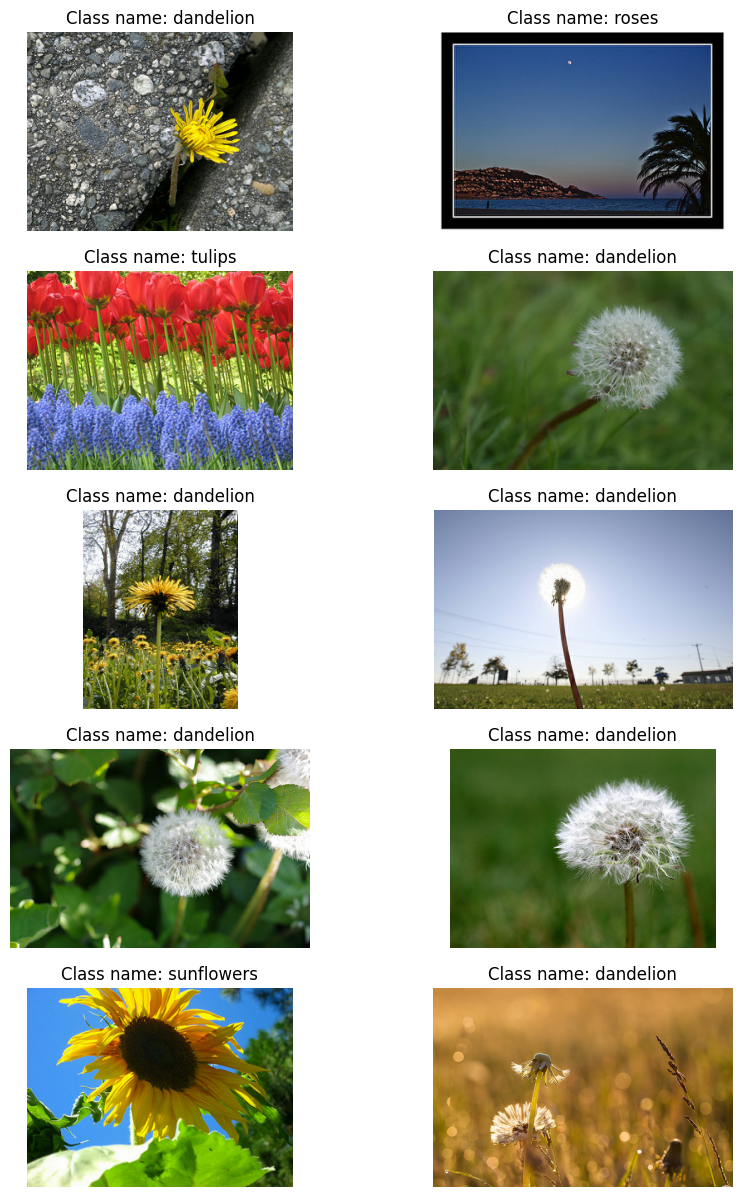

In [83]:
view_random_images(train_images, train_labels)

In [84]:
train_data = train_data.map(map_func=preprocess_img).shuffle(buffer_size=len(train_data)).batch(64).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(map_func=preprocess_img).batch(64).prefetch(tf.data.AUTOTUNE)

In [85]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [86]:
test_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
# Callbacks
import os
import datetime

CHECKPOINT_PATH = "model_experiments/flowers"
LOGS_PATH = "model_logs/flowers"

def checkpoint(model_name):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(CHECKPOINT_PATH, model_name), 
                                              save_best_only=True, 
                                              monitor="val_accuracy", 
                                              verbose=1)

def tensorboard(model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(LOGS_PATH, 
                                                       model_name, 
                                                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", 
                                                 patience=3, 
                                                 factor=0.1, 
                                                 min_lr=1e-5, 
                                                 verbose=1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/2))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  restore_best_weights=True, 
                                                  patience=5, verbose=1)

In [23]:
def model_evaluation(y_true, y_preds, y_preds_probs):
    y_preds = tf.squeeze(y_preds)
    acc = accuracy_score(y_true, y_preds)
    pre, rec, f1, _ = precision_recall_fscore_support(y_true, y_preds)
    roc_auc = roc_auc_score(y_true, y_preds_probs, multi_class="ovr")
    results = {"Accuracy": acc,
               "Precision": pre.mean(),
               "Recall": rec.mean(),
               "F1-Score": f1.mean(),
               "ROC-AUC": roc_auc}
    return results

In [24]:
def dataset_score_evaluation(model, train, test):
    train_score = model.evaluate(train)
    test_score = model.evaluate(test)
    return train_score, test_score

In [49]:
INPUT_SHAPE = (224, 224, 3)

In [34]:
inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [35]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19,284,869
Trainable params: 19,284,869
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_1_history = model_1.fit(train_data,
                              validation_data=test_data,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(test_data),
                              epochs=20,
                              callbacks=[tensorboard(model_1.name),
                                         checkpoint(model_1.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 13.0820 - accuracy: 0.3079
Epoch 1: val_accuracy improved from -inf to 0.39101, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 12s 135ms/step - loss: 13.0820 - accuracy: 0.3079 - val_loss: 2.8683 - val_accuracy: 0.3910 - lr: 0.0010
Epoch 2/20
45/46 [============================>.] - ETA: 0s - loss: 2.0300 - accuracy: 0.4052
Epoch 2: val_accuracy did not improve from 0.39101
46/46 [==============================] - 8s 75ms/step - loss: 2.0199 - accuracy: 0.4046 - val_loss: 1.6105 - val_accuracy: 0.3774 - lr: 0.0010
Epoch 3/20
45/46 [============================>.] - ETA: 0s - loss: 1.6651 - accuracy: 0.4142
Epoch 3: val_accuracy improved from 0.39101 to 0.40327, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 7s 123ms/step - loss: 1.6634 - accuracy: 0.4135 - val_loss: 1.6185 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 4/20
45/46 [============================>.] - ETA: 0s - loss: 1.3890 - accuracy: 0.4649
Epoch 4: val_accuracy did not improve from 0.40327
46/46 [==============================] - 5s 64ms/step - loss: 1.3822 - accuracy: 0.4676 - val_loss: 1.8628 - val_accuracy: 0.3760 - lr: 0.0010
Epoch 5/20
46/46 [==============================] - ETA: 0s - loss: 1.4344 - accuracy: 0.4867
Epoch 5: val_accuracy improved from 0.40327 to 0.41826, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 7s 117ms/step - loss: 1.4344 - accuracy: 0.4867 - val_loss: 1.5950 - val_accuracy: 0.4183 - lr: 0.0010
Epoch 6/20
46/46 [==============================] - ETA: 0s - loss: 1.2094 - accuracy: 0.5330
Epoch 6: val_accuracy improved from 0.41826 to 0.42643, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 7s 123ms/step - loss: 1.2094 - accuracy: 0.5330 - val_loss: 1.4498 - val_accuracy: 0.4264 - lr: 0.0010
Epoch 7/20
45/46 [============================>.] - ETA: 0s - loss: 1.1548 - accuracy: 0.5444
Epoch 7: val_accuracy improved from 0.42643 to 0.44959, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 7s 118ms/step - loss: 1.1517 - accuracy: 0.5453 - val_loss: 1.5216 - val_accuracy: 0.4496 - lr: 0.0010
Epoch 8/20
46/46 [==============================] - ETA: 0s - loss: 1.1223 - accuracy: 0.5685
Epoch 8: val_accuracy did not improve from 0.44959
46/46 [==============================] - 6s 88ms/step - loss: 1.1223 - accuracy: 0.5685 - val_loss: 1.5353 - val_accuracy: 0.4373 - lr: 0.0010
Epoch 9/20
45/46 [============================>.] - ETA: 0s - loss: 1.0791 - accuracy: 0.5899
Epoch 9: val_accuracy did not improve from 0.44959
46/46 [==============================] - 5s 64ms/step - loss: 1.0783 - accuracy: 0.5896 - val_loss: 2.2355 - val_accuracy: 0.3583 - lr: 0.0010
Epoch 10/20
45/46 [============================>.] - ETA: 0s - loss: 1.1499 - accuracy: 0.5694
Epoch 10: val_accuracy did not improve from 0.44959

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
46/46 [==============================] - 5s 63ms/step 

INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 11s 199ms/step - loss: 0.8068 - accuracy: 0.7142 - val_loss: 1.2856 - val_accuracy: 0.4728 - lr: 1.0000e-04
Epoch 12/20
46/46 [==============================] - ETA: 0s - loss: 0.7530 - accuracy: 0.7452
Epoch 12: val_accuracy improved from 0.47275 to 0.47820, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 11s 195ms/step - loss: 0.7530 - accuracy: 0.7452 - val_loss: 1.2892 - val_accuracy: 0.4782 - lr: 1.0000e-04
Epoch 13/20
46/46 [==============================] - ETA: 0s - loss: 0.7437 - accuracy: 0.7517
Epoch 13: val_accuracy did not improve from 0.47820
46/46 [==============================] - 8s 141ms/step - loss: 0.7437 - accuracy: 0.7517 - val_loss: 1.2935 - val_accuracy: 0.4687 - lr: 1.0000e-04
Epoch 14/20
46/46 [==============================] - ETA: 0s - loss: 0.7390 - accuracy: 0.7500
Epoch 14: val_accuracy improved from 0.47820 to 0.48365, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 9s 163ms/step - loss: 0.7390 - accuracy: 0.7500 - val_loss: 1.2870 - val_accuracy: 0.4837 - lr: 1.0000e-04
Epoch 15/20
46/46 [==============================] - ETA: 0s - loss: 0.7252 - accuracy: 0.7602
Epoch 15: val_accuracy did not improve from 0.48365
46/46 [==============================] - 8s 145ms/step - loss: 0.7252 - accuracy: 0.7602 - val_loss: 1.3126 - val_accuracy: 0.4782 - lr: 1.0000e-04
Epoch 16/20
46/46 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.7623
Epoch 16: val_accuracy improved from 0.48365 to 0.49183, saving model to model_experiments/flowers\model_1
INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 15s 275ms/step - loss: 0.7092 - accuracy: 0.7623 - val_loss: 1.2904 - val_accuracy: 0.4918 - lr: 1.0000e-04
Epoch 17/20
46/46 [==============================] - ETA: 0s - loss: 0.7084 - accuracy: 0.7633
Epoch 17: val_accuracy did not improve from 0.49183
46/46 [==============================] - 8s 139ms/step - loss: 0.7084 - accuracy: 0.7633 - val_loss: 1.3615 - val_accuracy: 0.4714 - lr: 1.0000e-04
Epoch 18/20
46/46 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.7599
Epoch 18: val_accuracy did not improve from 0.49183
46/46 [==============================] - 8s 141ms/step - loss: 0.6953 - accuracy: 0.7599 - val_loss: 1.3330 - val_accuracy: 0.4796 - lr: 1.0000e-04
Epoch 19/20
46/46 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.7626
Epoch 19: val_accuracy did not improve from 0.49183

Epoch 19: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
46/46 [============================

INFO:tensorflow:Assets written to: model_experiments/flowers\model_1\assets


46/46 [==============================] - 12s 226ms/step - loss: 0.6635 - accuracy: 0.7858 - val_loss: 1.2929 - val_accuracy: 0.4959 - lr: 1.0000e-05


In [37]:
dataset_score_evaluation(model_1, train_data, test_data)

12/12 [==============================] - 1s 52ms/step - loss: 1.2929 - accuracy: 0.4959


([0.6482279300689697, 0.794618546962738],
 [1.2928920984268188, 0.4959128201007843])

In [38]:
model_1_preds_probs = model_1.predict(test_data)
model_1_preds = tf.argmax(model_1_preds_probs, axis=1)
model_1_results = model_evaluation(test_labels, model_1_preds, model_1_preds_probs)
model_1_results

{'Accuracy': 0.49591280653950953,
 'Precision': 0.5144596538487428,
 'Recall': 0.49311998887179265,
 'F1-Score': 0.4969239662910615,
 'ROC-AUC': 0.7915532087988784}

In [40]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2")

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [41]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                           

In [42]:
model_2_history = model_2.fit(train_data,
                              validation_data=test_data,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(test_data),
                              epochs=20,
                              callbacks=[tensorboard(model_2.name),
                                         checkpoint(model_2.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 1.5780 - accuracy: 0.2807
Epoch 1: val_accuracy improved from -inf to 0.26975, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 52s 326ms/step - loss: 1.5780 - accuracy: 0.2807 - val_loss: 1.5390 - val_accuracy: 0.2698 - lr: 0.0010
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 1.5096 - accuracy: 0.3011
Epoch 2: val_accuracy did not improve from 0.26975
46/46 [==============================] - 16s 171ms/step - loss: 1.5096 - accuracy: 0.3011 - val_loss: 1.5117 - val_accuracy: 0.2616 - lr: 0.0010
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 1.4805 - accuracy: 0.3147
Epoch 3: val_accuracy improved from 0.26975 to 0.30109, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 12s 176ms/step - loss: 1.4805 - accuracy: 0.3147 - val_loss: 1.4711 - val_accuracy: 0.3011 - lr: 0.0010
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 1.4560 - accuracy: 0.3372
Epoch 4: val_accuracy improved from 0.30109 to 0.35559, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 10s 174ms/step - loss: 1.4560 - accuracy: 0.3372 - val_loss: 1.4367 - val_accuracy: 0.3556 - lr: 0.0010
Epoch 5/20
46/46 [==============================] - ETA: 0s - loss: 1.4170 - accuracy: 0.3886
Epoch 5: val_accuracy improved from 0.35559 to 0.40736, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 10s 187ms/step - loss: 1.4170 - accuracy: 0.3886 - val_loss: 1.4007 - val_accuracy: 0.4074 - lr: 0.0010
Epoch 6/20
46/46 [==============================] - ETA: 0s - loss: 1.3173 - accuracy: 0.4533
Epoch 6: val_accuracy improved from 0.40736 to 0.46049, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 13s 253ms/step - loss: 1.3173 - accuracy: 0.4533 - val_loss: 1.2575 - val_accuracy: 0.4605 - lr: 0.0010
Epoch 7/20
46/46 [==============================] - ETA: 0s - loss: 1.1937 - accuracy: 0.4986
Epoch 7: val_accuracy improved from 0.46049 to 0.49728, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 10s 178ms/step - loss: 1.1937 - accuracy: 0.4986 - val_loss: 1.1407 - val_accuracy: 0.4973 - lr: 0.0010
Epoch 8/20
46/46 [==============================] - ETA: 0s - loss: 1.1617 - accuracy: 0.4884
Epoch 8: val_accuracy improved from 0.49728 to 0.54496, saving model to model_experiments/flowers\model_2
INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_2\assets


46/46 [==============================] - 10s 184ms/step - loss: 1.1617 - accuracy: 0.4884 - val_loss: 1.1119 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 9/20
46/46 [==============================] - ETA: 0s - loss: 1.1447 - accuracy: 0.5102
Epoch 9: val_accuracy did not improve from 0.54496
46/46 [==============================] - 9s 154ms/step - loss: 1.1447 - accuracy: 0.5102 - val_loss: 1.0961 - val_accuracy: 0.5204 - lr: 0.0010
Epoch 10/20
46/46 [==============================] - ETA: 0s - loss: 1.1464 - accuracy: 0.5078
Epoch 10: val_accuracy did not improve from 0.54496
46/46 [==============================] - 9s 162ms/step - loss: 1.1464 - accuracy: 0.5078 - val_loss: 1.1312 - val_accuracy: 0.4864 - lr: 0.0010
Epoch 11/20
46/46 [==============================] - ETA: 0s - loss: 1.1316 - accuracy: 0.5221
Epoch 11: val_accuracy did not improve from 0.54496

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
46/46 [==============================] - 10s 180m

In [43]:
dataset_score_evaluation(model_2, train_data, test_data)

12/12 [==============================] - 1s 57ms/step - loss: 1.1119 - accuracy: 0.5450


([1.1515356302261353, 0.5136239528656006],
 [1.11192786693573, 0.5449591279029846])

In [44]:
model_2_preds_probs = model_2.predict(test_data)
model_2_preds = tf.argmax(model_2_preds_probs, axis=1)
model_2_results = model_evaluation(test_labels, model_2_preds, model_2_preds_probs)
model_2_results

{'Accuracy': 0.5449591280653951,
 'Precision': 0.5430684142519867,
 'Recall': 0.5439064439467016,
 'F1-Score': 0.5424171640040525,
 'ROC-AUC': 0.8422068996108681}

In [45]:
%load_ext tensorboard
%tensorboard --logdir model_logs/flowers --port 8080

In [51]:
tf.keras.backend.clear_session()

model_3 = tf.keras.models.clone_model(model_2)
model_3._name = "model_3_lr_schedule"

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_3_history = model_3.fit(train_data,
                              validation_data=test_data,
                              validation_steps=int(0.3 * len(test_data)),
                              steps_per_epoch=len(train_data),
                              epochs=15,
                              callbacks=[lr_scheduler])

Epoch 1/15
46/46 [==============================] - 8s 123ms/step - loss: 1.6166 - accuracy: 0.2224 - val_loss: 1.6191 - val_accuracy: 0.1667 - lr: 1.0000e-05
Epoch 2/15
46/46 [==============================] - 8s 123ms/step - loss: 1.6147 - accuracy: 0.2224 - val_loss: 1.6160 - val_accuracy: 0.1667 - lr: 3.1623e-05
Epoch 3/15
46/46 [==============================] - 8s 124ms/step - loss: 1.6107 - accuracy: 0.2224 - val_loss: 1.6105 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 4/15
46/46 [==============================] - 8s 129ms/step - loss: 1.6040 - accuracy: 0.2224 - val_loss: 1.6045 - val_accuracy: 0.1667 - lr: 3.1623e-04
Epoch 5/15
46/46 [==============================] - 7s 122ms/step - loss: 1.5595 - accuracy: 0.2599 - val_loss: 1.5309 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 6/15
46/46 [==============================] - 7s 124ms/step - loss: 1.3646 - accuracy: 0.4046 - val_loss: 1.3278 - val_accuracy: 0.4375 - lr: 0.0032
Epoch 7/15
46/46 [==============================] - 8s

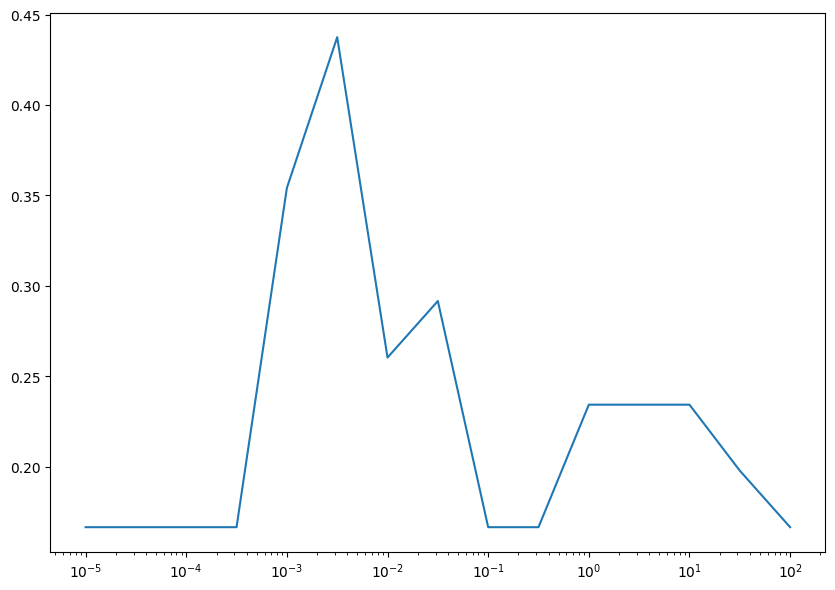

In [52]:
lrs = 1e-5 * 10 ** (tf.range(15)/2)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_3_history.history["val_accuracy"])

In [53]:
model_4 = tf.keras.models.clone_model(model_2)
model_4._name = "model_4"

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["accuracy"])

model_4_history = model_4.fit(train_data,
                              validation_data=test_data,
                              epochs=20,
                              callbacks=[tensorboard(model_4.name),
                                         checkpoint(model_4.name),
                                         early_stopping])

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 1.5642 - accuracy: 0.2953
Epoch 1: val_accuracy improved from -inf to 0.32561, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 9s 154ms/step - loss: 1.5642 - accuracy: 0.2953 - val_loss: 1.5357 - val_accuracy: 0.3256
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 1.4977 - accuracy: 0.3215
Epoch 2: val_accuracy improved from 0.32561 to 0.35695, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 8s 143ms/step - loss: 1.4977 - accuracy: 0.3215 - val_loss: 1.4565 - val_accuracy: 0.3569
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 1.3196 - accuracy: 0.4540
Epoch 3: val_accuracy improved from 0.35695 to 0.48638, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 8s 146ms/step - loss: 1.3196 - accuracy: 0.4540 - val_loss: 1.2146 - val_accuracy: 0.4864
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 1.2181 - accuracy: 0.4966
Epoch 4: val_accuracy improved from 0.48638 to 0.51907, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 8s 144ms/step - loss: 1.2181 - accuracy: 0.4966 - val_loss: 1.1795 - val_accuracy: 0.5191
Epoch 5/20
46/46 [==============================] - ETA: 0s - loss: 1.1768 - accuracy: 0.5201
Epoch 5: val_accuracy did not improve from 0.51907
46/46 [==============================] - 8s 125ms/step - loss: 1.1768 - accuracy: 0.5201 - val_loss: 1.1088 - val_accuracy: 0.5191
Epoch 6/20
46/46 [==============================] - ETA: 0s - loss: 1.1446 - accuracy: 0.5191
Epoch 6: val_accuracy did not improve from 0.51907
46/46 [==============================] - 7s 126ms/step - loss: 1.1446 - accuracy: 0.5191 - val_loss: 1.1382 - val_accuracy: 0.4728
Epoch 7/20
46/46 [==============================] - ETA: 0s - loss: 1.1233 - accuracy: 0.5518
Epoch 7: val_accuracy did not improve from 0.51907
46/46 [==============================] - 8s 136ms/step - loss: 1.1233 - accuracy: 0.5518 - val_loss: 1.1346 - val_accuracy: 0.4973
Epoch 8/20
46/46 [=======================

INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 11s 197ms/step - loss: 1.0763 - accuracy: 0.5760 - val_loss: 1.0186 - val_accuracy: 0.5913
Epoch 9/20
46/46 [==============================] - ETA: 0s - loss: 1.0331 - accuracy: 0.6022
Epoch 9: val_accuracy did not improve from 0.59128
46/46 [==============================] - 8s 136ms/step - loss: 1.0331 - accuracy: 0.6022 - val_loss: 1.0004 - val_accuracy: 0.5899
Epoch 10/20
46/46 [==============================] - ETA: 0s - loss: 1.0067 - accuracy: 0.6093
Epoch 10: val_accuracy did not improve from 0.59128
46/46 [==============================] - 8s 140ms/step - loss: 1.0067 - accuracy: 0.6093 - val_loss: 0.9738 - val_accuracy: 0.5886
Epoch 11/20
46/46 [==============================] - ETA: 0s - loss: 0.9932 - accuracy: 0.6097
Epoch 11: val_accuracy improved from 0.59128 to 0.62262, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 9s 162ms/step - loss: 0.9932 - accuracy: 0.6097 - val_loss: 0.9500 - val_accuracy: 0.6226
Epoch 12/20
46/46 [==============================] - ETA: 0s - loss: 0.9566 - accuracy: 0.6284
Epoch 12: val_accuracy did not improve from 0.62262
46/46 [==============================] - 8s 145ms/step - loss: 0.9566 - accuracy: 0.6284 - val_loss: 1.0094 - val_accuracy: 0.5668
Epoch 13/20
46/46 [==============================] - ETA: 0s - loss: 0.9554 - accuracy: 0.6294
Epoch 13: val_accuracy improved from 0.62262 to 0.64305, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 9s 163ms/step - loss: 0.9554 - accuracy: 0.6294 - val_loss: 0.9192 - val_accuracy: 0.6431
Epoch 14/20
46/46 [==============================] - ETA: 0s - loss: 0.9520 - accuracy: 0.6216
Epoch 14: val_accuracy improved from 0.64305 to 0.65804, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 9s 168ms/step - loss: 0.9520 - accuracy: 0.6216 - val_loss: 0.9081 - val_accuracy: 0.6580
Epoch 15/20
46/46 [==============================] - ETA: 0s - loss: 0.9147 - accuracy: 0.6533
Epoch 15: val_accuracy improved from 0.65804 to 0.66076, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 10s 179ms/step - loss: 0.9147 - accuracy: 0.6533 - val_loss: 0.9517 - val_accuracy: 0.6608
Epoch 16/20
46/46 [==============================] - ETA: 0s - loss: 0.9130 - accuracy: 0.6536
Epoch 16: val_accuracy improved from 0.66076 to 0.66894, saving model to model_experiments/flowers\model_4
INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 9s 167ms/step - loss: 0.9130 - accuracy: 0.6536 - val_loss: 0.8782 - val_accuracy: 0.6689
Epoch 17/20
46/46 [==============================] - ETA: 0s - loss: 0.8826 - accuracy: 0.6546
Epoch 17: val_accuracy did not improve from 0.66894
46/46 [==============================] - 9s 156ms/step - loss: 0.8826 - accuracy: 0.6546 - val_loss: 0.8761 - val_accuracy: 0.6621
Epoch 18/20
46/46 [==============================] - ETA: 0s - loss: 0.8826 - accuracy: 0.6611
Epoch 18: val_accuracy did not improve from 0.66894
46/46 [==============================] - 9s 155ms/step - loss: 0.8826 - accuracy: 0.6611 - val_loss: 0.8803 - val_accuracy: 0.6635
Epoch 19/20
46/46 [==============================] - ETA: 0s - loss: 0.8797 - accuracy: 0.6604
Epoch 19: val_accuracy did not improve from 0.66894
46/46 [==============================] - 9s 157ms/step - loss: 0.8797 - accuracy: 0.6604 - val_loss: 0.8703 - val_accuracy: 0.6553
Epoch 20/20
46/46 [================

INFO:tensorflow:Assets written to: model_experiments/flowers\model_4\assets


46/46 [==============================] - 10s 185ms/step - loss: 0.8624 - accuracy: 0.6720 - val_loss: 0.8393 - val_accuracy: 0.6839


In [54]:
dataset_score_evaluation(model_4, train_data, test_data)

12/12 [==============================] - 1s 62ms/step - loss: 0.8393 - accuracy: 0.6839


([0.844984769821167, 0.6815395355224609],
 [0.8392781615257263, 0.6839237213134766])

In [55]:
model_4_preds_probs = model_4.predict(test_data)
model_4_preds = tf.argmax(model_4_preds_probs, axis = 1)
model_4_results = model_evaluation(test_labels, model_4_preds, model_4_preds_probs)
model_4_results

{'Accuracy': 0.6839237057220708,
 'Precision': 0.6897809382181305,
 'Recall': 0.681637345342491,
 'F1-Score': 0.681418206160109,
 'ROC-AUC': 0.9126865504100042}

In [57]:
inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.AveragePooling2D(2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.AveragePooling2D(2)(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5")

model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["accuracy"])

model_5_history = model_5.fit(train_data,
                              validation_data=test_data,
                              epochs=20,
                              callbacks=[tensorboard(model_5.name),
                                         checkpoint(model_5.name),
                                         early_stopping])

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 1.5588 - accuracy: 0.2575
Epoch 1: val_accuracy improved from -inf to 0.24523, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 13s 169ms/step - loss: 1.5588 - accuracy: 0.2575 - val_loss: 1.5289 - val_accuracy: 0.2452
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 1.4982 - accuracy: 0.3072
Epoch 2: val_accuracy improved from 0.24523 to 0.32425, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 10s 158ms/step - loss: 1.4982 - accuracy: 0.3072 - val_loss: 1.4885 - val_accuracy: 0.3243
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 1.4838 - accuracy: 0.3324
Epoch 3: val_accuracy improved from 0.32425 to 0.35695, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 9s 149ms/step - loss: 1.4838 - accuracy: 0.3324 - val_loss: 1.4841 - val_accuracy: 0.3569
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 1.4428 - accuracy: 0.3835
Epoch 4: val_accuracy improved from 0.35695 to 0.35967, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 9s 149ms/step - loss: 1.4428 - accuracy: 0.3835 - val_loss: 1.5468 - val_accuracy: 0.3597
Epoch 5/20
46/46 [==============================] - ETA: 0s - loss: 1.4077 - accuracy: 0.3910
Epoch 5: val_accuracy improved from 0.35967 to 0.42234, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 9s 153ms/step - loss: 1.4077 - accuracy: 0.3910 - val_loss: 1.3989 - val_accuracy: 0.4223
Epoch 6/20
46/46 [==============================] - ETA: 0s - loss: 1.3649 - accuracy: 0.4016
Epoch 6: val_accuracy improved from 0.42234 to 0.42643, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 12s 200ms/step - loss: 1.3649 - accuracy: 0.4016 - val_loss: 1.3610 - val_accuracy: 0.4264
Epoch 7/20
46/46 [==============================] - ETA: 0s - loss: 1.3321 - accuracy: 0.4418
Epoch 7: val_accuracy improved from 0.42643 to 0.47684, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 13s 209ms/step - loss: 1.3321 - accuracy: 0.4418 - val_loss: 1.2999 - val_accuracy: 0.4768
Epoch 8/20
46/46 [==============================] - ETA: 0s - loss: 1.3127 - accuracy: 0.4537
Epoch 8: val_accuracy improved from 0.47684 to 0.49183, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 13s 195ms/step - loss: 1.3127 - accuracy: 0.4537 - val_loss: 1.2652 - val_accuracy: 0.4918
Epoch 9/20
46/46 [==============================] - ETA: 0s - loss: 1.2803 - accuracy: 0.4779
Epoch 9: val_accuracy did not improve from 0.49183
46/46 [==============================] - 10s 148ms/step - loss: 1.2803 - accuracy: 0.4779 - val_loss: 1.3401 - val_accuracy: 0.4469
Epoch 10/20
46/46 [==============================] - ETA: 0s - loss: 1.2604 - accuracy: 0.4966
Epoch 10: val_accuracy improved from 0.49183 to 0.55995, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 13s 219ms/step - loss: 1.2604 - accuracy: 0.4966 - val_loss: 1.1965 - val_accuracy: 0.5599
Epoch 11/20
46/46 [==============================] - ETA: 0s - loss: 1.1922 - accuracy: 0.5426
Epoch 11: val_accuracy did not improve from 0.55995
46/46 [==============================] - 11s 195ms/step - loss: 1.1922 - accuracy: 0.5426 - val_loss: 1.1819 - val_accuracy: 0.5327
Epoch 12/20
46/46 [==============================] - ETA: 0s - loss: 1.1907 - accuracy: 0.5368
Epoch 12: val_accuracy improved from 0.55995 to 0.58992, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 10s 180ms/step - loss: 1.1907 - accuracy: 0.5368 - val_loss: 1.1139 - val_accuracy: 0.5899
Epoch 13/20
46/46 [==============================] - ETA: 0s - loss: 1.1236 - accuracy: 0.5705
Epoch 13: val_accuracy improved from 0.58992 to 0.59673, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 10s 173ms/step - loss: 1.1236 - accuracy: 0.5705 - val_loss: 1.0660 - val_accuracy: 0.5967
Epoch 14/20
46/46 [==============================] - ETA: 0s - loss: 1.0705 - accuracy: 0.6056
Epoch 14: val_accuracy did not improve from 0.59673
46/46 [==============================] - 10s 156ms/step - loss: 1.0705 - accuracy: 0.6056 - val_loss: 1.1121 - val_accuracy: 0.5722
Epoch 15/20
46/46 [==============================] - ETA: 0s - loss: 1.0466 - accuracy: 0.6032
Epoch 15: val_accuracy improved from 0.59673 to 0.62534, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 14s 260ms/step - loss: 1.0466 - accuracy: 0.6032 - val_loss: 1.0127 - val_accuracy: 0.6253
Epoch 16/20
46/46 [==============================] - ETA: 0s - loss: 1.0240 - accuracy: 0.6117
Epoch 16: val_accuracy improved from 0.62534 to 0.63215, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 12s 189ms/step - loss: 1.0240 - accuracy: 0.6117 - val_loss: 0.9761 - val_accuracy: 0.6322
Epoch 17/20
46/46 [==============================] - ETA: 0s - loss: 0.9870 - accuracy: 0.6308
Epoch 17: val_accuracy improved from 0.63215 to 0.65123, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 11s 185ms/step - loss: 0.9870 - accuracy: 0.6308 - val_loss: 0.9301 - val_accuracy: 0.6512
Epoch 18/20
46/46 [==============================] - ETA: 0s - loss: 0.9689 - accuracy: 0.6277
Epoch 18: val_accuracy improved from 0.65123 to 0.65804, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 11s 189ms/step - loss: 0.9689 - accuracy: 0.6277 - val_loss: 0.9277 - val_accuracy: 0.6580
Epoch 19/20
46/46 [==============================] - ETA: 0s - loss: 0.9603 - accuracy: 0.6471
Epoch 19: val_accuracy improved from 0.65804 to 0.66757, saving model to model_experiments/flowers\model_5
INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_5\assets


46/46 [==============================] - 10s 178ms/step - loss: 0.9603 - accuracy: 0.6471 - val_loss: 0.8928 - val_accuracy: 0.6676
Epoch 20/20
46/46 [==============================] - ETA: 0s - loss: 0.9594 - accuracy: 0.6345
Epoch 20: val_accuracy did not improve from 0.66757
46/46 [==============================] - 9s 153ms/step - loss: 0.9594 - accuracy: 0.6345 - val_loss: 0.9133 - val_accuracy: 0.6526


In [59]:
model_6 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalMaxPool2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_6")

model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["accuracy"])

model_6_history = model_6.fit(train_data,
                              validation_data=test_data,
                              epochs=10,
                              callbacks=[early_stopping])

Epoch 1/10
46/46 [==============================] - 13s 184ms/step - loss: 1.4938 - accuracy: 0.3457 - val_loss: 1.2695 - val_accuracy: 0.4237
Epoch 2/10
46/46 [==============================] - 9s 133ms/step - loss: 1.1311 - accuracy: 0.5446 - val_loss: 1.1165 - val_accuracy: 0.5381
Epoch 3/10
46/46 [==============================] - 8s 125ms/step - loss: 1.0427 - accuracy: 0.5712 - val_loss: 1.0551 - val_accuracy: 0.5708
Epoch 4/10
46/46 [==============================] - 7s 125ms/step - loss: 1.0114 - accuracy: 0.5943 - val_loss: 0.9740 - val_accuracy: 0.6063
Epoch 5/10
46/46 [==============================] - 8s 126ms/step - loss: 0.9655 - accuracy: 0.6250 - val_loss: 1.0180 - val_accuracy: 0.5572
Epoch 6/10
46/46 [==============================] - 7s 126ms/step - loss: 0.9385 - accuracy: 0.6277 - val_loss: 1.0598 - val_accuracy: 0.5627
Epoch 7/10
46/46 [==============================] - 8s 128ms/step - loss: 0.9097 - accuracy: 0.6410 - val_loss: 0.9112 - val_accuracy: 0.6172
Epoch

In [60]:
model_7 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_7")

model_7.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["accuracy"])

model_7_history = model_7.fit(train_data,
                              validation_data=test_data,
                              epochs=10,
                              callbacks=[early_stopping])

Epoch 1/10
46/46 [==============================] - 9s 135ms/step - loss: 1.5193 - accuracy: 0.3120 - val_loss: 1.3843 - val_accuracy: 0.4087
Epoch 2/10
46/46 [==============================] - 8s 131ms/step - loss: 1.3103 - accuracy: 0.4397 - val_loss: 1.2945 - val_accuracy: 0.4060
Epoch 3/10
46/46 [==============================] - 8s 132ms/step - loss: 1.2683 - accuracy: 0.4493 - val_loss: 1.2391 - val_accuracy: 0.4496
Epoch 4/10
46/46 [==============================] - 8s 133ms/step - loss: 1.2823 - accuracy: 0.4479 - val_loss: 1.2653 - val_accuracy: 0.4659
Epoch 5/10
46/46 [==============================] - 9s 149ms/step - loss: 1.2534 - accuracy: 0.4636 - val_loss: 1.1851 - val_accuracy: 0.4823
Epoch 6/10
46/46 [==============================] - 9s 146ms/step - loss: 1.1947 - accuracy: 0.5003 - val_loss: 1.1171 - val_accuracy: 0.5068
Epoch 7/10
46/46 [==============================] - 9s 146ms/step - loss: 1.1651 - accuracy: 0.5129 - val_loss: 1.0756 - val_accuracy: 0.5381
Epoch 

In [64]:
tf.keras.backend.clear_session()

model_8 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalMaxPool2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_8")

model_8.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])

model_8_history = model_8.fit(train_data,
                              validation_data=test_data,
                              epochs=10,
                              callbacks=[early_stopping])

Epoch 1/10
46/46 [==============================] - 15s 207ms/step - loss: 1.5899 - accuracy: 0.2681 - val_loss: 1.4754 - val_accuracy: 0.3801
Epoch 2/10
46/46 [==============================] - 11s 153ms/step - loss: 1.2362 - accuracy: 0.5085 - val_loss: 1.1143 - val_accuracy: 0.5722
Epoch 3/10
46/46 [==============================] - 10s 158ms/step - loss: 1.1104 - accuracy: 0.5691 - val_loss: 1.0586 - val_accuracy: 0.5831
Epoch 4/10
46/46 [==============================] - 10s 170ms/step - loss: 1.0306 - accuracy: 0.6090 - val_loss: 1.0473 - val_accuracy: 0.5926
Epoch 5/10
46/46 [==============================] - 10s 174ms/step - loss: 0.9814 - accuracy: 0.6301 - val_loss: 1.0011 - val_accuracy: 0.6049
Epoch 6/10
46/46 [==============================] - 11s 180ms/step - loss: 0.9335 - accuracy: 0.6512 - val_loss: 0.9220 - val_accuracy: 0.6526
Epoch 7/10
46/46 [==============================] - 10s 167ms/step - loss: 0.9170 - accuracy: 0.6557 - val_loss: 0.8758 - val_accuracy: 0.6621

In [67]:
tf.keras.backend.clear_session()

model_9 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalMaxPool2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_9")

model_9.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])

model_9_history = model_9.fit(train_data,
                              validation_data=test_data,
                              epochs=10,
                              callbacks=[early_stopping])

Epoch 1/10
46/46 [==============================] - 154s 487ms/step - loss: 1.3487 - accuracy: 0.4264 - val_loss: 1.2008 - val_accuracy: 0.4700
Epoch 2/10
46/46 [==============================] - 28s 275ms/step - loss: 1.1113 - accuracy: 0.5375 - val_loss: 1.1294 - val_accuracy: 0.5232
Epoch 3/10
46/46 [==============================] - 18s 290ms/step - loss: 1.0537 - accuracy: 0.5674 - val_loss: 0.9591 - val_accuracy: 0.6144
Epoch 4/10
46/46 [==============================] - 16s 295ms/step - loss: 0.9601 - accuracy: 0.6196 - val_loss: 0.9033 - val_accuracy: 0.6349
Epoch 5/10
46/46 [==============================] - 17s 332ms/step - loss: 0.8903 - accuracy: 0.6499 - val_loss: 0.9060 - val_accuracy: 0.6335
Epoch 6/10
46/46 [==============================] - 18s 349ms/step - loss: 0.8789 - accuracy: 0.6570 - val_loss: 0.8784 - val_accuracy: 0.6567
Epoch 7/10
46/46 [==============================] - 19s 357ms/step - loss: 0.8674 - accuracy: 0.6591 - val_loss: 0.7986 - val_accuracy: 0.694

In [68]:
dataset_score_evaluation(model_9, train_data, test_data)

12/12 [==============================] - 1s 92ms/step - loss: 0.7451 - accuracy: 0.7207


([0.722269594669342, 0.7377384305000305],
 [0.745132327079773, 0.720708429813385])

<Axes: >

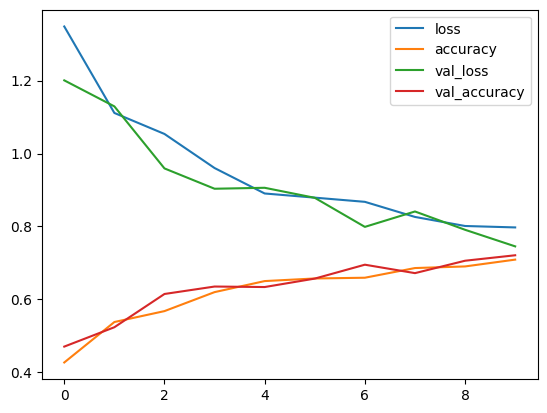

In [69]:
pd.DataFrame(model_9_history.history).plot()

In [94]:
tf.keras.backend.clear_session()

model_10 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(64, 3, activation="relu"),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation="relu"),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalMaxPool2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_10")

model_10.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])

model_10_history = model_10.fit(train_data,
                                validation_data=test_data,
                                epochs=10,
                                callbacks=[early_stopping])

Epoch 1/10
46/46 [==============================] - 13s 201ms/step - loss: 1.4656 - accuracy: 0.3249 - val_loss: 1.2564 - val_accuracy: 0.4550
Epoch 2/10
46/46 [==============================] - 9s 168ms/step - loss: 1.2025 - accuracy: 0.5037 - val_loss: 1.0198 - val_accuracy: 0.5981
Epoch 3/10
46/46 [==============================] - 10s 170ms/step - loss: 0.9860 - accuracy: 0.6131 - val_loss: 0.9480 - val_accuracy: 0.6117
Epoch 4/10
46/46 [==============================] - 10s 166ms/step - loss: 0.9293 - accuracy: 0.6311 - val_loss: 1.0852 - val_accuracy: 0.5763
Epoch 5/10
46/46 [==============================] - 10s 168ms/step - loss: 0.8994 - accuracy: 0.6475 - val_loss: 0.8221 - val_accuracy: 0.6717
Epoch 6/10
46/46 [==============================] - 10s 170ms/step - loss: 0.8321 - accuracy: 0.6723 - val_loss: 0.8122 - val_accuracy: 0.6662
Epoch 7/10
46/46 [==============================] - 10s 174ms/step - loss: 0.8177 - accuracy: 0.6904 - val_loss: 0.7916 - val_accuracy: 0.6839


In [97]:
tf.keras.backend.clear_session()

model_11 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalMaxPool2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_11_max_out")

model_11.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])

model_11_history = model_11.fit(train_data,
                                validation_data=test_data,
                                epochs=100,
                                callbacks=[early_stopping,
                                           tensorboard(model_11.name),
                                           checkpoint(model_11.name)])

Epoch 1/100
46/46 [==============================] - ETA: 0s - loss: 1.5560 - accuracy: 0.2844
Epoch 1: val_accuracy improved from -inf to 0.37057, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 10s 142ms/step - loss: 1.5560 - accuracy: 0.2844 - val_loss: 1.4502 - val_accuracy: 0.3706
Epoch 2/100
46/46 [==============================] - ETA: 0s - loss: 1.2276 - accuracy: 0.4714
Epoch 2: val_accuracy improved from 0.37057 to 0.55586, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 8s 122ms/step - loss: 1.2276 - accuracy: 0.4714 - val_loss: 1.0581 - val_accuracy: 0.5559
Epoch 3/100
46/46 [==============================] - ETA: 0s - loss: 1.0242 - accuracy: 0.5743
Epoch 3: val_accuracy improved from 0.55586 to 0.57766, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 8s 130ms/step - loss: 1.0242 - accuracy: 0.5743 - val_loss: 1.0114 - val_accuracy: 0.5777
Epoch 4/100
46/46 [==============================] - ETA: 0s - loss: 0.9418 - accuracy: 0.6281
Epoch 4: val_accuracy improved from 0.57766 to 0.64578, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 8s 126ms/step - loss: 0.9418 - accuracy: 0.6281 - val_loss: 0.8825 - val_accuracy: 0.6458
Epoch 5/100
46/46 [==============================] - ETA: 0s - loss: 0.8668 - accuracy: 0.6713
Epoch 5: val_accuracy improved from 0.64578 to 0.67847, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 8s 134ms/step - loss: 0.8668 - accuracy: 0.6713 - val_loss: 0.8192 - val_accuracy: 0.6785
Epoch 6/100
46/46 [==============================] - ETA: 0s - loss: 0.8577 - accuracy: 0.6693
Epoch 6: val_accuracy did not improve from 0.67847
46/46 [==============================] - 8s 115ms/step - loss: 0.8577 - accuracy: 0.6693 - val_loss: 0.8600 - val_accuracy: 0.6281
Epoch 7/100
46/46 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.6880
Epoch 7: val_accuracy improved from 0.67847 to 0.68529, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 9s 147ms/step - loss: 0.8067 - accuracy: 0.6880 - val_loss: 0.7873 - val_accuracy: 0.6853
Epoch 8/100
46/46 [==============================] - ETA: 0s - loss: 0.7693 - accuracy: 0.7074
Epoch 8: val_accuracy did not improve from 0.68529
46/46 [==============================] - 8s 120ms/step - loss: 0.7693 - accuracy: 0.7074 - val_loss: 0.8367 - val_accuracy: 0.6676
Epoch 9/100
46/46 [==============================] - ETA: 0s - loss: 0.7499 - accuracy: 0.7125
Epoch 9: val_accuracy did not improve from 0.68529
46/46 [==============================] - 7s 115ms/step - loss: 0.7499 - accuracy: 0.7125 - val_loss: 0.7860 - val_accuracy: 0.6853
Epoch 10/100
46/46 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.7309
Epoch 10: val_accuracy did not improve from 0.68529
46/46 [==============================] - 8s 125ms/step - loss: 0.7286 - accuracy: 0.7309 - val_loss: 0.7864 - val_accuracy: 0.6839
Epoch 11/100
46/46 [================

INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 9s 154ms/step - loss: 0.6953 - accuracy: 0.7374 - val_loss: 0.7327 - val_accuracy: 0.7112
Epoch 12/100
46/46 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.7490
Epoch 12: val_accuracy did not improve from 0.71117
46/46 [==============================] - 8s 127ms/step - loss: 0.6672 - accuracy: 0.7490 - val_loss: 0.7614 - val_accuracy: 0.6853
Epoch 13/100
46/46 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.7503
Epoch 13: val_accuracy did not improve from 0.71117
46/46 [==============================] - 9s 145ms/step - loss: 0.6687 - accuracy: 0.7503 - val_loss: 0.7937 - val_accuracy: 0.7071
Epoch 14/100
46/46 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.7473
Epoch 14: val_accuracy did not improve from 0.71117
46/46 [==============================] - 8s 124ms/step - loss: 0.6666 - accuracy: 0.7473 - val_loss: 0.7512 - val_accuracy: 0.7098
Epoch 15/100
46/46 [============

INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 20s 389ms/step - loss: 0.6074 - accuracy: 0.7677 - val_loss: 0.7316 - val_accuracy: 0.7302
Epoch 17/100
46/46 [==============================] - ETA: 0s - loss: 0.5874 - accuracy: 0.7813
Epoch 17: val_accuracy improved from 0.73025 to 0.73161, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 9s 127ms/step - loss: 0.5874 - accuracy: 0.7813 - val_loss: 0.6944 - val_accuracy: 0.7316
Epoch 18/100
46/46 [==============================] - ETA: 0s - loss: 0.5722 - accuracy: 0.7868
Epoch 18: val_accuracy did not improve from 0.73161
46/46 [==============================] - 8s 106ms/step - loss: 0.5722 - accuracy: 0.7868 - val_loss: 0.7515 - val_accuracy: 0.7262
Epoch 19/100
46/46 [==============================] - ETA: 0s - loss: 0.5841 - accuracy: 0.7851
Epoch 19: val_accuracy did not improve from 0.73161
46/46 [==============================] - 8s 112ms/step - loss: 0.5841 - accuracy: 0.7851 - val_loss: 0.7063 - val_accuracy: 0.7262
Epoch 20/100
46/46 [==============================] - ETA: 0s - loss: 0.5134 - accuracy: 0.8123
Epoch 20: val_accuracy improved from 0.73161 to 0.74387, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 9s 139ms/step - loss: 0.5134 - accuracy: 0.8123 - val_loss: 0.7188 - val_accuracy: 0.7439
Epoch 21/100
46/46 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.8147
Epoch 21: val_accuracy did not improve from 0.74387
46/46 [==============================] - 8s 115ms/step - loss: 0.5142 - accuracy: 0.8147 - val_loss: 0.7765 - val_accuracy: 0.7221
Epoch 22/100
46/46 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.8140
Epoch 22: val_accuracy improved from 0.74387 to 0.74796, saving model to model_experiments/flowers\model_11_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_11_max_out\assets


46/46 [==============================] - 9s 149ms/step - loss: 0.4936 - accuracy: 0.8140 - val_loss: 0.7170 - val_accuracy: 0.7480
Epoch 23/100
46/46 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.8287
Epoch 23: val_accuracy did not improve from 0.74796
46/46 [==============================] - 8s 120ms/step - loss: 0.4664 - accuracy: 0.8287 - val_loss: 0.7596 - val_accuracy: 0.7234
Epoch 24/100
46/46 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.8253
Epoch 24: val_accuracy did not improve from 0.74796
46/46 [==============================] - 8s 112ms/step - loss: 0.4785 - accuracy: 0.8253 - val_loss: 0.8574 - val_accuracy: 0.7044
Epoch 25/100
46/46 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.8239
Epoch 25: val_accuracy did not improve from 0.74796
46/46 [==============================] - 8s 121ms/step - loss: 0.4798 - accuracy: 0.8239 - val_loss: 0.7505 - val_accuracy: 0.7166
Epoch 26/100
46/46 [============

In [98]:
dataset_score_evaluation(model_11, train_data, test_data)

12/12 [==============================] - 1s 69ms/step - loss: 0.7170 - accuracy: 0.7480


([0.4061792492866516, 0.8538828492164612],
 [0.7169675827026367, 0.747956395149231])

In [99]:
model_11_preds_probs = model_11.predict(test_data)
model_11_preds = tf.argmax(model_11_preds_probs, axis=1)
model_11_results = model_evaluation(test_labels, model_11_preds, model_11_preds_probs)

In [100]:
model_11_results

{'Accuracy': 0.7479564032697548,
 'Precision': 0.7489093897547646,
 'Recall': 0.7448692562989743,
 'F1-Score': 0.745643279558442,
 'ROC-AUC': 0.9392657138812981}

In [122]:
def create_cnn(num_conv2d,
               num_filters,
               padding):

    print("""
    num_conv2d: %d
    num_filters: %d
    padding: %s
    """ % (num_conv2d,
           num_filters,
           padding))

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=INPUT_SHAPE, dtype=tf.float32))
    for i in range(num_conv2d):
        model.add(layers.Conv2D(num_filters, 3, padding=padding, activation="relu"))
        model.add(layers.Conv2D(num_filters, 3, padding=padding, activation="relu"))
        model.add(layers.MaxPooling2D(2))
    model.add(layers.GlobalMaxPool2D())
    model.add(layers.Dense(len(class_names), activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                  metrics=["accuracy"])

    return model

In [115]:
from skopt import gp_minimize
from skopt.space import Integer, Categorical
from skopt.utils import use_named_args

In [116]:
dim_num_conv2d = Integer(low=2, high=4, name="num_conv2d")
dim_num_filters = Categorical(categories=[32, 40, 48, 56, 64], name="num_filters")
dim_padding = Categorical(categories=["valid", "same"], name="padding")

In [117]:
param_grid = [dim_num_conv2d, dim_num_filters, dim_padding]

In [118]:
@use_named_args(param_grid)
def objective(**params):

    model = create_cnn(**params)

    history = model.fit(train_data,
                        validation_data=test_data,
                        validation_steps=int(0.3 * len(test_data)),
                        epochs=5)

    accuracy = history.history["val_accuracy"][-1]

    print(f"\nAccuracy: {accuracy*100:.2f}%\n")

    return -accuracy

In [119]:
initial_parameters = [2, 32, "valid"]
objective(x=initial_parameters)


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5
46/46 [==============================] - 7s 85ms/step - loss: 1.3588 - accuracy: 0.4036 - val_loss: 1.2712 - val_accuracy: 0.4323
Epoch 2/5
46/46 [==============================] - 6s 88ms/step - loss: 1.0519 - accuracy: 0.5787 - val_loss: 1.0537 - val_accuracy: 0.5885
Epoch 3/5
46/46 [==============================] - 6s 83ms/step - loss: 0.9296 - accuracy: 0.6352 - val_loss: 1.0408 - val_accuracy: 0.5990
Epoch 4/5
46/46 [==============================] - 6s 83ms/step - loss: 0.8358 - accuracy: 0.6785 - val_loss: 0.9348 - val_accuracy: 0.6250
Epoch 5/5
46/46 [==============================] - 6s 84ms/step - loss: 0.8287 - accuracy: 0.6798 - val_loss: 0.9356 - val_accuracy: 0.6094

Accuracy: 60.94%



-0.609375

In [123]:
gp = gp_minimize(objective,
                 param_grid,
                 x0=initial_parameters,
                 n_calls=30,
                 n_jobs=-1,
                 random_state=42)


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5
46/46 [==============================] - 7s 96ms/step - loss: 1.3880 - accuracy: 0.3614 - val_loss: 1.3274 - val_accuracy: 0.4375
Epoch 2/5
46/46 [==============================] - 5s 85ms/step - loss: 1.2037 - accuracy: 0.4915 - val_loss: 1.3122 - val_accuracy: 0.4792
Epoch 3/5
46/46 [==============================] - 6s 87ms/step - loss: 1.0590 - accuracy: 0.5651 - val_loss: 1.2097 - val_accuracy: 0.5260
Epoch 4/5
46/46 [==============================] - 6s 91ms/step - loss: 0.9685 - accuracy: 0.6104 - val_loss: 1.1309 - val_accuracy: 0.5938
Epoch 5/5
46/46 [==============================] - 6s 88ms/step - loss: 0.8991 - accuracy: 0.6502 - val_loss: 1.0606 - val_accuracy: 0.6094

Accuracy: 60.94%


    num_conv2d: 4
    num_filters: 40
    padding: valid
    
Epoch 1/5
46/46 [==============================] - 8s 132ms/step - loss: 1.6732 - accuracy: 0.2428 - val_loss: 1.6133 - val_accuracy: 0.2344
Epoch 2/5
46/4

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 16s 302ms/step - loss: 1.3444 - accuracy: 0.4070 - val_loss: 1.3017 - val_accuracy: 0.4896
Epoch 2/5
46/46 [==============================] - 14s 259ms/step - loss: 1.1190 - accuracy: 0.5351 - val_loss: 1.1415 - val_accuracy: 0.5521
Epoch 3/5
46/46 [==============================] - 16s 306ms/step - loss: 1.0278 - accuracy: 0.5879 - val_loss: 1.0473 - val_accuracy: 0.5833
Epoch 4/5
46/46 [==============================] - 13s 237ms/step - loss: 0.8920 - accuracy: 0.6454 - val_loss: 1.0060 - val_accuracy: 0.6146
Epoch 5/5
46/46 [==============================] - 13s 245ms/step - loss: 0.8829 - accuracy: 0.6577 - val_loss: 0.9478 - val_accuracy: 0.6250

Accuracy: 62.50%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 10s 153ms/step - loss: 1.3752 - accuracy: 0.3982 - val_loss: 1.2819 - val_accuracy: 0.5156
Epoch 2/5
46/46 [==============================] - 9s 152ms/step - loss: 1.1102 - accuracy: 0.5569 - val_loss: 1.1289 - val_accuracy: 0.5781
Epoch 3/5
46/46 [==============================] - 8s 138ms/step - loss: 0.9776 - accuracy: 0.6270 - val_loss: 1.1020 - val_accuracy: 0.5521
Epoch 4/5
46/46 [==============================] - 8s 125ms/step - loss: 0.9179 - accuracy: 0.6444 - val_loss: 1.0378 - val_accuracy: 0.5938
Epoch 5/5
46/46 [==============================] - 7s 113ms/step - loss: 0.8607 - accuracy: 0.6771 - val_loss: 0.9632 - val_accuracy: 0.6146

Accuracy: 61.46%


    num_conv2d: 3
    num_filters: 64
    padding: valid
    
Epoch 1/5
46/46 [==============================] - 13s 216ms/step - loss: 1.5266 - accuracy: 0.3072 - val_loss: 1.4015 - val_accuracy: 0.3802
Epoch 2/5
46/46 [==============================] - 12s 214ms/step - loss: 1.2802

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 16s 293ms/step - loss: 1.3756 - accuracy: 0.4029 - val_loss: 1.2944 - val_accuracy: 0.4375
Epoch 2/5
46/46 [==============================] - 13s 250ms/step - loss: 1.1571 - accuracy: 0.5221 - val_loss: 1.1655 - val_accuracy: 0.5104
Epoch 3/5
46/46 [==============================] - 15s 279ms/step - loss: 1.0382 - accuracy: 0.5821 - val_loss: 1.1441 - val_accuracy: 0.5260
Epoch 4/5
46/46 [==============================] - 17s 322ms/step - loss: 0.9516 - accuracy: 0.6260 - val_loss: 1.0252 - val_accuracy: 0.5938
Epoch 5/5
46/46 [==============================] - 14s 272ms/step - loss: 0.8923 - accuracy: 0.6526 - val_loss: 1.0220 - val_accuracy: 0.5833

Accuracy: 58.33%


    num_conv2d: 4
    num_filters: 64
    padding: same
    
Epoch 1/5
46/46 [==============================] - 15s 263ms/step - loss: 3.1108 - accuracy: 0.2500 - val_loss: 1.6117 - val_accuracy: 0.2344
Epoch 2/5
46/46 [==============================] - 15s 276ms/step - loss: 1.5

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 8s 114ms/step - loss: 1.3003 - accuracy: 0.4332 - val_loss: 1.2440 - val_accuracy: 0.5156
Epoch 2/5
46/46 [==============================] - 9s 157ms/step - loss: 1.0675 - accuracy: 0.5722 - val_loss: 1.3215 - val_accuracy: 0.5052
Epoch 3/5
46/46 [==============================] - 9s 142ms/step - loss: 0.9592 - accuracy: 0.6410 - val_loss: 1.0210 - val_accuracy: 0.5990
Epoch 4/5
46/46 [==============================] - 8s 139ms/step - loss: 0.8895 - accuracy: 0.6550 - val_loss: 1.0422 - val_accuracy: 0.6302
Epoch 5/5
46/46 [==============================] - 8s 123ms/step - loss: 0.8493 - accuracy: 0.6727 - val_loss: 0.9186 - val_accuracy: 0.6719

Accuracy: 67.19%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 8s 130ms/step - loss: 1.5123 - accuracy: 0.2977 - val_loss: 1.3557 - val_accuracy: 0.4167
Epoch 2/5
46/46 [==============================] - 7s 103ms/step - loss: 1.1561 - accuracy: 0.5208 - val_loss: 1.1905 - val_accuracy: 0.5469
Epoch 3/5
46/46 [==============================] - 8s 123ms/step - loss: 1.0528 - accuracy: 0.5797 - val_loss: 1.0546 - val_accuracy: 0.5625
Epoch 4/5
46/46 [==============================] - 7s 108ms/step - loss: 0.9521 - accuracy: 0.6270 - val_loss: 1.0367 - val_accuracy: 0.6042
Epoch 5/5
46/46 [==============================] - 7s 112ms/step - loss: 0.8855 - accuracy: 0.6516 - val_loss: 1.0136 - val_accuracy: 0.5781

Accuracy: 57.81%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 9s 137ms/step - loss: 1.2576 - accuracy: 0.4601 - val_loss: 1.1867 - val_accuracy: 0.5000
Epoch 2/5
46/46 [==============================] - 9s 147ms/step - loss: 0.9799 - accuracy: 0.6052 - val_loss: 1.0479 - val_accuracy: 0.5938
Epoch 3/5
46/46 [==============================] - 8s 131ms/step - loss: 0.9301 - accuracy: 0.6352 - val_loss: 1.1022 - val_accuracy: 0.5677
Epoch 4/5
46/46 [==============================] - 9s 148ms/step - loss: 0.8850 - accuracy: 0.6608 - val_loss: 1.0166 - val_accuracy: 0.5781
Epoch 5/5
46/46 [==============================] - 8s 136ms/step - loss: 0.8028 - accuracy: 0.6918 - val_loss: 1.0121 - val_accuracy: 0.5938

Accuracy: 59.38%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 9s 128ms/step - loss: 1.4078 - accuracy: 0.3593 - val_loss: 1.3863 - val_accuracy: 0.4062
Epoch 2/5
46/46 [==============================] - 7s 105ms/step - loss: 1.1494 - accuracy: 0.5170 - val_loss: 1.1242 - val_accuracy: 0.5625
Epoch 3/5
46/46 [==============================] - 7s 104ms/step - loss: 1.0144 - accuracy: 0.5940 - val_loss: 1.0604 - val_accuracy: 0.5833
Epoch 4/5
46/46 [==============================] - 12s 212ms/step - loss: 0.9105 - accuracy: 0.6499 - val_loss: 1.0585 - val_accuracy: 0.5833
Epoch 5/5
46/46 [==============================] - 8s 137ms/step - loss: 0.8984 - accuracy: 0.6601 - val_loss: 1.1331 - val_accuracy: 0.5573

Accuracy: 55.73%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 10s 172ms/step - loss: 1.5519 - accuracy: 0.2684 - val_loss: 1.4043 - val_accuracy: 0.3906
Epoch 2/5
46/46 [==============================] - 8s 134ms/step - loss: 1.1585 - accuracy: 0.5232 - val_loss: 1.0795 - val_accuracy: 0.5677
Epoch 3/5
46/46 [==============================] - 8s 124ms/step - loss: 1.0286 - accuracy: 0.5770 - val_loss: 1.1167 - val_accuracy: 0.5833
Epoch 4/5
46/46 [==============================] - 7s 116ms/step - loss: 0.9200 - accuracy: 0.6311 - val_loss: 1.0108 - val_accuracy: 0.6406
Epoch 5/5
46/46 [==============================] - 7s 117ms/step - loss: 0.8782 - accuracy: 0.6505 - val_loss: 1.0002 - val_accuracy: 0.5833

Accuracy: 58.33%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 8s 125ms/step - loss: 1.4017 - accuracy: 0.3900 - val_loss: 1.3211 - val_accuracy: 0.4167
Epoch 2/5
46/46 [==============================] - 7s 107ms/step - loss: 1.1851 - accuracy: 0.4973 - val_loss: 1.2151 - val_accuracy: 0.5312
Epoch 3/5
46/46 [==============================] - 8s 143ms/step - loss: 1.1004 - accuracy: 0.5569 - val_loss: 1.1290 - val_accuracy: 0.5521
Epoch 4/5
46/46 [==============================] - 8s 122ms/step - loss: 0.9456 - accuracy: 0.6270 - val_loss: 1.0090 - val_accuracy: 0.5833
Epoch 5/5
46/46 [==============================] - 7s 115ms/step - loss: 0.9231 - accuracy: 0.6379 - val_loss: 1.0530 - val_accuracy: 0.5990

Accuracy: 59.90%


    num_conv2d: 3
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 13s 225ms/step - loss: 1.4932 - accuracy: 0.3011 - val_loss: 1.3467 - val_accuracy: 0.4062
Epoch 2/5
46/46 [==============================] - 7s 119ms/step - loss: 1.2081 - accuracy: 0.5221 - val_loss: 1.0714 - val_accuracy: 0.5573
Epoch 3/5
46/46 [==============================] - 7s 106ms/step - loss: 1.0117 - accuracy: 0.6032 - val_loss: 1.1185 - val_accuracy: 0.5365
Epoch 4/5
46/46 [==============================] - 9s 151ms/step - loss: 0.9311 - accuracy: 0.6301 - val_loss: 1.0806 - val_accuracy: 0.5469
Epoch 5/5
46/46 [==============================] - 7s 105ms/step - loss: 0.9018 - accuracy: 0.6434 - val_loss: 1.0929 - val_accuracy: 0.5833

Accuracy: 58.33%


    num_conv2d: 2
    num_filters: 32
    padding: same
    
Epoch 1/5
46/46 [==============================] - 10s 155ms/step - loss: 1.3889 - accuracy: 0.3992 - val_loss: 1.3214 - val_accuracy: 0.4531
Epoch 2/5
46/46 [==============================] - 7s 113ms/step - loss: 1.1496 -

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 7s 111ms/step - loss: 1.3922 - accuracy: 0.3668 - val_loss: 1.2723 - val_accuracy: 0.4635
Epoch 2/5
46/46 [==============================] - 9s 150ms/step - loss: 1.1126 - accuracy: 0.5501 - val_loss: 1.0582 - val_accuracy: 0.5469
Epoch 3/5
46/46 [==============================] - 7s 107ms/step - loss: 0.9420 - accuracy: 0.6250 - val_loss: 1.0048 - val_accuracy: 0.6042
Epoch 4/5
46/46 [==============================] - 8s 139ms/step - loss: 0.9139 - accuracy: 0.6383 - val_loss: 0.9577 - val_accuracy: 0.5885
Epoch 5/5
46/46 [==============================] - 7s 112ms/step - loss: 0.8484 - accuracy: 0.6563 - val_loss: 0.8763 - val_accuracy: 0.6562

Accuracy: 65.62%


    num_conv2d: 2
    num_filters: 32
    padding: same
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 8s 125ms/step - loss: 1.3499 - accuracy: 0.4087 - val_loss: 1.3340 - val_accuracy: 0.4583
Epoch 2/5
46/46 [==============================] - 10s 175ms/step - loss: 1.1236 - accuracy: 0.5436 - val_loss: 1.1347 - val_accuracy: 0.5260
Epoch 3/5
46/46 [==============================] - 8s 127ms/step - loss: 0.9642 - accuracy: 0.6260 - val_loss: 0.9832 - val_accuracy: 0.6302
Epoch 4/5
46/46 [==============================] - 7s 119ms/step - loss: 0.9211 - accuracy: 0.6410 - val_loss: 0.9779 - val_accuracy: 0.6250
Epoch 5/5
46/46 [==============================] - 7s 109ms/step - loss: 0.8523 - accuracy: 0.6778 - val_loss: 0.9370 - val_accuracy: 0.6615

Accuracy: 66.15%


    num_conv2d: 2
    num_filters: 32
    padding: same
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 9s 133ms/step - loss: 1.3504 - accuracy: 0.4155 - val_loss: 1.3239 - val_accuracy: 0.4271
Epoch 2/5
46/46 [==============================] - 8s 143ms/step - loss: 1.1669 - accuracy: 0.5078 - val_loss: 1.2739 - val_accuracy: 0.4271
Epoch 3/5
46/46 [==============================] - 7s 111ms/step - loss: 1.0520 - accuracy: 0.5800 - val_loss: 1.2557 - val_accuracy: 0.4792
Epoch 4/5
46/46 [==============================] - 7s 116ms/step - loss: 0.9859 - accuracy: 0.6124 - val_loss: 1.0296 - val_accuracy: 0.5729
Epoch 5/5
46/46 [==============================] - 12s 222ms/step - loss: 0.8919 - accuracy: 0.6553 - val_loss: 1.0307 - val_accuracy: 0.6042

Accuracy: 60.42%


    num_conv2d: 2
    num_filters: 32
    padding: same
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 8s 120ms/step - loss: 1.3798 - accuracy: 0.3971 - val_loss: 1.4044 - val_accuracy: 0.4427
Epoch 2/5
46/46 [==============================] - 8s 123ms/step - loss: 1.2039 - accuracy: 0.5078 - val_loss: 1.1843 - val_accuracy: 0.5365
Epoch 3/5
46/46 [==============================] - 10s 161ms/step - loss: 1.0198 - accuracy: 0.5967 - val_loss: 1.1613 - val_accuracy: 0.5312
Epoch 4/5
46/46 [==============================] - 7s 103ms/step - loss: 0.9006 - accuracy: 0.6546 - val_loss: 0.9632 - val_accuracy: 0.6510
Epoch 5/5
46/46 [==============================] - 8s 133ms/step - loss: 0.8369 - accuracy: 0.6775 - val_loss: 0.9163 - val_accuracy: 0.6146

Accuracy: 61.46%


    num_conv2d: 2
    num_filters: 32
    padding: valid
    
Epoch 1/5


C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


46/46 [==============================] - 8s 105ms/step - loss: 1.4442 - accuracy: 0.3382 - val_loss: 1.3303 - val_accuracy: 0.3646
Epoch 2/5
46/46 [==============================] - 10s 171ms/step - loss: 1.0963 - accuracy: 0.5409 - val_loss: 1.2081 - val_accuracy: 0.5052
Epoch 3/5
46/46 [==============================] - 12s 219ms/step - loss: 0.9765 - accuracy: 0.6134 - val_loss: 0.9903 - val_accuracy: 0.6198
Epoch 4/5
46/46 [==============================] - 8s 113ms/step - loss: 0.9416 - accuracy: 0.6226 - val_loss: 0.9927 - val_accuracy: 0.6146
Epoch 5/5
46/46 [==============================] - 8s 118ms/step - loss: 0.8520 - accuracy: 0.6703 - val_loss: 0.9759 - val_accuracy: 0.6042

Accuracy: 60.42%



In [124]:
print(f"Best score: {gp.fun}")

Best score: -0.671875


In [127]:
print(f"num_conv2d: {gp.x[0]}\nnum_filters: {gp.x[1]}\npadding: {gp.x[2]}")

num_conv2d: 2
num_filters: 32
padding: valid


In [128]:
tf.keras.backend.clear_session()

model_12 = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE, dtype=tf.float32),
    layers.Conv2D(32, 3, padding="valid", activation="relu"),
    layers.Conv2D(32, 3, padding="valid", activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, padding="valid", activation="relu"),
    layers.Conv2D(32, 3, padding="valid", activation="relu"),
    layers.MaxPooling2D(2),
    layers.GlobalMaxPool2D(),
    layers.Dense(len(class_names), activation="softmax")
], name="model_12_max_out")

model_12.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])

model_12_history = model_12.fit(train_data,
                                validation_data=test_data,
                                epochs=100,
                                callbacks=[early_stopping,
                                           tensorboard(model_12.name),
                                           checkpoint(model_12.name)])

Epoch 1/100
46/46 [==============================] - ETA: 0s - loss: 1.3347 - accuracy: 0.4196
Epoch 1: val_accuracy improved from -inf to 0.51090, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 10s 165ms/step - loss: 1.3347 - accuracy: 0.4196 - val_loss: 1.1918 - val_accuracy: 0.5109
Epoch 2/100
46/46 [==============================] - ETA: 0s - loss: 1.1531 - accuracy: 0.5208
Epoch 2: val_accuracy improved from 0.51090 to 0.57902, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 20s 400ms/step - loss: 1.1531 - accuracy: 0.5208 - val_loss: 1.0548 - val_accuracy: 0.5790
Epoch 3/100
46/46 [==============================] - ETA: 0s - loss: 1.0300 - accuracy: 0.5916
Epoch 3: val_accuracy did not improve from 0.57902
46/46 [==============================] - 7s 98ms/step - loss: 1.0300 - accuracy: 0.5916 - val_loss: 1.0364 - val_accuracy: 0.5613
Epoch 4/100
46/46 [==============================] - ETA: 0s - loss: 0.9562 - accuracy: 0.6304
Epoch 4: val_accuracy improved from 0.57902 to 0.64305, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 8s 122ms/step - loss: 0.9562 - accuracy: 0.6304 - val_loss: 0.9100 - val_accuracy: 0.6431
Epoch 5/100
46/46 [==============================] - ETA: 0s - loss: 0.9336 - accuracy: 0.6349
Epoch 5: val_accuracy did not improve from 0.64305
46/46 [==============================] - 7s 102ms/step - loss: 0.9336 - accuracy: 0.6349 - val_loss: 1.0243 - val_accuracy: 0.5736
Epoch 6/100
46/46 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.6604
Epoch 6: val_accuracy improved from 0.64305 to 0.65940, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 8s 130ms/step - loss: 0.8820 - accuracy: 0.6604 - val_loss: 0.8677 - val_accuracy: 0.6594
Epoch 7/100
46/46 [==============================] - ETA: 0s - loss: 0.8136 - accuracy: 0.6914
Epoch 7: val_accuracy improved from 0.65940 to 0.67302, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 8s 123ms/step - loss: 0.8136 - accuracy: 0.6914 - val_loss: 0.8028 - val_accuracy: 0.6730
Epoch 8/100
46/46 [==============================] - ETA: 0s - loss: 0.8038 - accuracy: 0.6839
Epoch 8: val_accuracy improved from 0.67302 to 0.70572, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 8s 124ms/step - loss: 0.8038 - accuracy: 0.6839 - val_loss: 0.7791 - val_accuracy: 0.7057
Epoch 9/100
46/46 [==============================] - ETA: 0s - loss: 0.7783 - accuracy: 0.6945
Epoch 9: val_accuracy did not improve from 0.70572
46/46 [==============================] - 7s 106ms/step - loss: 0.7783 - accuracy: 0.6945 - val_loss: 0.7913 - val_accuracy: 0.7016
Epoch 10/100
46/46 [==============================] - ETA: 0s - loss: 0.7614 - accuracy: 0.7108
Epoch 10: val_accuracy did not improve from 0.70572
46/46 [==============================] - 7s 108ms/step - loss: 0.7614 - accuracy: 0.7108 - val_loss: 0.8108 - val_accuracy: 0.6812
Epoch 11/100
46/46 [==============================] - ETA: 0s - loss: 0.7403 - accuracy: 0.7105
Epoch 11: val_accuracy did not improve from 0.70572
46/46 [==============================] - 7s 108ms/step - loss: 0.7403 - accuracy: 0.7105 - val_loss: 0.7801 - val_accuracy: 0.7057
Epoch 12/100
46/46 [==============

INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 8s 126ms/step - loss: 0.7101 - accuracy: 0.7231 - val_loss: 0.7466 - val_accuracy: 0.7112
Epoch 13/100
46/46 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.7364
Epoch 13: val_accuracy improved from 0.71117 to 0.72888, saving model to model_experiments/flowers\model_12_max_out
INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_12_max_out\assets


46/46 [==============================] - 8s 129ms/step - loss: 0.7057 - accuracy: 0.7364 - val_loss: 0.7171 - val_accuracy: 0.7289
Epoch 14/100
46/46 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.7364
Epoch 14: val_accuracy did not improve from 0.72888
46/46 [==============================] - 7s 108ms/step - loss: 0.6776 - accuracy: 0.7364 - val_loss: 0.7309 - val_accuracy: 0.7234
Epoch 15/100
46/46 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.7408
Epoch 15: val_accuracy did not improve from 0.72888
46/46 [==============================] - 8s 119ms/step - loss: 0.6939 - accuracy: 0.7408 - val_loss: 0.7245 - val_accuracy: 0.7262
Epoch 16/100
46/46 [==============================] - ETA: 0s - loss: 0.6487 - accuracy: 0.7534
Epoch 16: val_accuracy did not improve from 0.72888
46/46 [==============================] - 7s 113ms/step - loss: 0.6487 - accuracy: 0.7534 - val_loss: 0.7418 - val_accuracy: 0.7139
Epoch 17/100
46/46 [============

In [130]:
%tensorboard --logdir model_logs/flowers --port 8080

Reusing TensorBoard on port 8080 (pid 7416), started 2:26:08 ago. (Use '!kill 7416' to kill it.)

In [131]:
dataset_score_evaluation(model_12, train_data, test_data)

12/12 [==============================] - 1s 64ms/step - loss: 0.7171 - accuracy: 0.7289


([0.6390809416770935, 0.7551090121269226],
 [0.7171190977096558, 0.7288828492164612])

In [132]:
model_12_preds_probs = model_12.predict(test_data)
model_12_preds = tf.argmax(model_12_preds_probs, axis =1)
model_12_results = model_evaluation(test_labels, model_12_preds, model_12_preds_probs)
model_12_results

{'Accuracy': 0.728882833787466,
 'Precision': 0.7272474318002142,
 'Recall': 0.7261764403648474,
 'F1-Score': 0.7255311655447024,
 'ROC-AUC': 0.9327016736328687}

In [26]:
import tensorflow_hub as hub

In [54]:
# Transfer learning - Feature extraction
base_model = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-feature-vector/versions/1",
                            name="feature_extraction_layer",
                            input_shape=INPUT_SHAPE)

base_model.trainable = False

In [60]:
model_13 = tf.keras.Sequential([
    base_model,
    layers.Dense(len(class_names), activation="softmax")
], name="model_13_hub_tf")

In [61]:
model_13.summary()

Model: "model_13_hub_tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 dense_3 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 4,055,969
Trainable params: 6,405
Non-trainable params: 4,049,564
_________________________________________________________________


In [62]:
model_13.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                 metrics="accuracy")

model_13_history = model_13.fit(train_data,
                                validation_data=test_data,
                                epochs=7,
                                callbacks=[tensorboard(model_13.name),
                                           checkpoint(model_13.name),
                                           early_stopping])

Epoch 1/7
46/46 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8464
Epoch 1: val_accuracy improved from -inf to 0.92779, saving model to model_experiments/flowers\model_13_hub_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


46/46 [==============================] - 343s 3s/step - loss: 0.4245 - accuracy: 0.8464 - val_loss: 0.2092 - val_accuracy: 0.9278
Epoch 2/7
46/46 [==============================] - ETA: 0s - loss: 0.1649 - accuracy: 0.9475
Epoch 2: val_accuracy improved from 0.92779 to 0.93733, saving model to model_experiments/flowers\model_13_hub_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


46/46 [==============================] - 64s 1s/step - loss: 0.1649 - accuracy: 0.9475 - val_loss: 0.1871 - val_accuracy: 0.9373
Epoch 3/7
46/46 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9697
Epoch 3: val_accuracy improved from 0.93733 to 0.95232, saving model to model_experiments/flowers\model_13_hub_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


46/46 [==============================] - 56s 969ms/step - loss: 0.1129 - accuracy: 0.9697 - val_loss: 0.1639 - val_accuracy: 0.9523
Epoch 4/7
46/46 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9867
Epoch 4: val_accuracy did not improve from 0.95232
46/46 [==============================] - 24s 352ms/step - loss: 0.0822 - accuracy: 0.9867 - val_loss: 0.1601 - val_accuracy: 0.9469
Epoch 5/7
46/46 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9908
Epoch 5: val_accuracy did not improve from 0.95232
46/46 [==============================] - 20s 327ms/step - loss: 0.0626 - accuracy: 0.9908 - val_loss: 0.1655 - val_accuracy: 0.9510
Epoch 6/7
46/46 [==============================] - ETA: 0s - loss: 0.0485 - accuracy: 0.9939
Epoch 6: val_accuracy improved from 0.95232 to 0.95368, saving model to model_experiments/flowers\model_13_hub_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_13_hub_tf\assets


46/46 [==============================] - 116s 2s/step - loss: 0.0485 - accuracy: 0.9939 - val_loss: 0.1540 - val_accuracy: 0.9537
Epoch 7/7
46/46 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9959
Epoch 7: val_accuracy did not improve from 0.95368
46/46 [==============================] - 31s 385ms/step - loss: 0.0398 - accuracy: 0.9959 - val_loss: 0.1599 - val_accuracy: 0.9482


In [63]:
dataset_score_evaluation(model_13, train_data, test_data)

12/12 [==============================] - 4s 248ms/step - loss: 0.1599 - accuracy: 0.9482


([0.03113110177218914, 0.9996594190597534],
 [0.15987157821655273, 0.9482288956642151])

In [65]:
model_13_preds_probs = model_13.predict(test_data)
model_13_preds = tf.argmax(model_13_preds_probs, axis=1)
model_13_results = model_evaluation(test_labels, model_13_preds, model_13_preds_probs)
model_13_results

{'Accuracy': 0.9482288828337875,
 'Precision': 0.9484356921653301,
 'Recall': 0.9474093238581945,
 'F1-Score': 0.947717227343108,
 'ROC-AUC': 0.9962764458377962}

In [66]:
model_13_loaded = tf.keras.models.load_model(CHECKPOINT_PATH + "/" + model_13.name)
model_13_loaded_preds_probs = model_13_loaded.predict(test_data)
model_13_loaded_preds = tf.argmax(model_13_loaded_preds_probs, axis=1)
model_13_loaded_results = model_evaluation(test_labels, model_13_loaded_preds, model_13_loaded_preds_probs)
model_13_loaded_results

{'Accuracy': 0.9536784741144414,
 'Precision': 0.9538838612368025,
 'Recall': 0.9531062811366777,
 'F1-Score': 0.953303575504483,
 'ROC-AUC': 0.9965788588189621}

In [67]:
%load_ext tensorboard
%tensorboard --logdir model_logs/flowers --port 8081

In [87]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_14 = tf.keras.Model(inputs, outputs, name="model_14_tf_tf")

model_14.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                 metrics=["accuracy"])

model_14_history = model_14.fit(train_data,
                                validation_data=test_data,
                                epochs=7,
                                callbacks=[tensorboard(model_14.name),
                                           checkpoint(model_14.name)])

Epoch 1/7
46/46 [==============================] - ETA: 0s - loss: 0.4638 - accuracy: 0.8351
Epoch 1: val_accuracy improved from -inf to 0.91826, saving model to model_experiments/flowers\model_14_tf_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


46/46 [==============================] - 102s 2s/step - loss: 0.4638 - accuracy: 0.8351 - val_loss: 0.2390 - val_accuracy: 0.9183
Epoch 2/7
46/46 [==============================] - ETA: 0s - loss: 0.1958 - accuracy: 0.9353
Epoch 2: val_accuracy improved from 0.91826 to 0.93188, saving model to model_experiments/flowers\model_14_tf_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


46/46 [==============================] - 85s 2s/step - loss: 0.1958 - accuracy: 0.9353 - val_loss: 0.2027 - val_accuracy: 0.9319
Epoch 3/7
46/46 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9598
Epoch 3: val_accuracy did not improve from 0.93188
46/46 [==============================] - 95s 482ms/step - loss: 0.1427 - accuracy: 0.9598 - val_loss: 0.1816 - val_accuracy: 0.9319
Epoch 4/7
46/46 [==============================] - ETA: 0s - loss: 0.1106 - accuracy: 0.9704
Epoch 4: val_accuracy improved from 0.93188 to 0.94142, saving model to model_experiments/flowers\model_14_tf_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


46/46 [==============================] - 86s 2s/step - loss: 0.1106 - accuracy: 0.9704 - val_loss: 0.1825 - val_accuracy: 0.9414
Epoch 5/7
46/46 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.9768
Epoch 5: val_accuracy improved from 0.94142 to 0.94550, saving model to model_experiments/flowers\model_14_tf_tf
INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


INFO:tensorflow:Assets written to: model_experiments/flowers\model_14_tf_tf\assets


46/46 [==============================] - 84s 2s/step - loss: 0.0920 - accuracy: 0.9768 - val_loss: 0.1666 - val_accuracy: 0.9455
Epoch 6/7
46/46 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9809
Epoch 6: val_accuracy did not improve from 0.94550
46/46 [==============================] - 58s 368ms/step - loss: 0.0790 - accuracy: 0.9809 - val_loss: 0.1685 - val_accuracy: 0.9414
Epoch 7/7
46/46 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9850
Epoch 7: val_accuracy did not improve from 0.94550
46/46 [==============================] - 22s 318ms/step - loss: 0.0633 - accuracy: 0.9850 - val_loss: 0.1736 - val_accuracy: 0.9373


In [88]:
model_14_preds_probs = model_14.predict(test_data)
model_14_preds = tf.argmax(model_14_preds_probs, axis=1)
model_14_results = model_evaluation(test_labels, model_14_preds, model_14_preds_probs)
model_14_results

{'Accuracy': 0.9373297002724795,
 'Precision': 0.9396435907428045,
 'Recall': 0.9363871875121601,
 'F1-Score': 0.9371525257416137,
 'ROC-AUC': 0.9959362525950123}

In [89]:
model_14_loaded = tf.keras.models.load_model(CHECKPOINT_PATH + "/" + model_14.name)
model_14_loaded_preds_probs = model_14_loaded.predict(test_data)
model_14_loaded_preds = tf.argmax(model_14_loaded_preds_probs, axis=1)
model_14_loaded_results = model_evaluation(test_labels, model_14_loaded_preds, model_14_loaded_preds_probs)
model_14_loaded_results

{'Accuracy': 0.9455040871934605,
 'Precision': 0.9453588077043799,
 'Recall': 0.9457537754716687,
 'F1-Score': 0.9454800545673356,
 'ROC-AUC': 0.9960983182157758}

In [90]:
model_14.summary()

Model: "model_14_tf_tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainable params: 4,049,571
_________________________________________________________________


In [91]:
model_13.save("model_13_hub_tf_efficientnetB0.h5")
model_14.save("model_14_tf_tf_efficientnetB0.h5")

In [92]:
%tensorboard --logdir model_logs/flowers --port 8081

Reusing TensorBoard on port 8081 (pid 30544), started 0:28:28 ago. (Use '!kill 30544' to kill it.)

In [93]:
pd.DataFrame(test_labels).value_counts()

0    158
3    151
2    146
1    141
4    138
Name: count, dtype: int64

In [98]:
pd.DataFrame(train_labels).value_counts()

0    740
2    653
3    548
4    503
1    492
Name: count, dtype: int64

In [103]:
pd.DataFrame(train_labels)[0].unique()

array([2, 3, 4, 0, 1], dtype=int64)